# Part I - Walmart Retail Dataset
## by Arikan Udoka

## Introduction
> This document explores a dataset containing approximately 8399 walmart orders from 795 customers across 48 States in the United States of America divvied up into 4 regions. It also contains product categories, their sub categories, unit price, sales, profit, discount and others 



## Preliminary Wrangling


### Extract

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#load dataset into pandas dataframe and read statistics
walmart = pd.read_csv('walmart_retail.csv')

In [3]:
print(walmart.shape)
print(walmart.dtypes)

(8399, 25)
City                     object
Customer Age            float64
Customer Name            object
Customer Segment         object
Discount                float64
Number of Records         int64
Order Date               object
Order ID                  int64
Order Priority           object
Order Quantity            int64
Product Base Margin     float64
Product Category         object
Product Container        object
Product Name             object
Product Sub-Category     object
Profit                  float64
Region                   object
Row ID                    int64
Sales                   float64
Ship Date                object
Ship Mode                object
Shipping Cost           float64
State                    object
Unit Price              float64
Zip Code                  int64
dtype: object


In [4]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  8399 non-null   object 
 1   Customer Age          7496 non-null   float64
 2   Customer Name         8399 non-null   object 
 3   Customer Segment      8399 non-null   object 
 4   Discount              8399 non-null   float64
 5   Number of Records     8399 non-null   int64  
 6   Order Date            8399 non-null   object 
 7   Order ID              8399 non-null   int64  
 8   Order Priority        8399 non-null   object 
 9   Order Quantity        8399 non-null   int64  
 10  Product Base Margin   8336 non-null   float64
 11  Product Category      8399 non-null   object 
 12  Product Container     8399 non-null   object 
 13  Product Name          8399 non-null   object 
 14  Product Sub-Category  8399 non-null   object 
 15  Profit               

In [5]:
walmart.head()

,City,Customer Age,Customer Name,Customer Segment,Discount,Number of Records,Order Date,Order ID,Order Priority,Order Quantity,...,Profit,Region,Row ID,Sales,Ship Date,Ship Mode,Shipping Cost,State,Unit Price,Zip Code
0,McKeesport,NaN,Jessica Myrick,Small Business,0.10,1,1/1/2012,28774,High,32,...,-111.80,East,4031,180.36,1/2/2012,Regular Air,4.69,Pennsylvania,5.98,15131
1,Bowie,NaN,Matt Collister,Home Office,0.08,1,1/1/2012,13729,Not Specified,9,...,-342.91,East,1914,872.48,1/3/2012,Express Air,35.00,Maryland,95.99,20715
2,Napa,NaN,Alan Schoenberger,Corporate,0.00,1,1/2/2012,37537,Low,4,...,-193.08,West,5272,1239.06,1/2/2012,Delivery Truck,48.80,California,291.73,94559
3,Montebello,NaN,Elizabeth Moffitt,Consumer,0.08,1,1/2/2012,44069,Critical,43,...,247.79,West,6225,614.80,1/2/2012,Regular Air,1.97,California,15.04,90640
4,Napa,NaN,Alan Schoenberger,Corporate,0.07,1,1/2/2012,37537,Low,43,...,-1049.85,West,5273,4083.19,1/4/2012,Delivery Truck,45.00,California,100.98,94559


In [6]:
#rename all columns in the dataframe
walmart.rename(columns=lambda x:x.strip().lower().replace(' ','_'), inplace=True)

In [7]:
#rename product_sub-category to product_subcategory
walmart.rename(columns={'product_sub-category':'product_subcategory'}, inplace=True)

In [8]:
#drop columns from the dataframe
walmart.drop(['customer_name','order_id', 'row_id', 'customer_age', 'zip_code', 'number_of_records', 'city', 'product_name'], axis=1, inplace=True)

In [9]:
#drop null values from the dataframe
walmart.dropna(inplace=True)

In [10]:
walmart.shape

(8336, 17)

In [11]:
#drop duplicated rows from the dataframe
walmart.drop_duplicates(inplace=True)

In [12]:
walmart.shape

(8336, 17)

In [13]:
walmart.state.value_counts()

California        773
Texas             574
Illinois          493
Florida           475
Ohio              395
New York          372
Michigan          291
Indiana           239
Washington        238
Minnesota         237
Pennsylvania      215
North Carolina    209
Virginia          195
Georgia           180
Maryland          176
New Jersey        175
Colorado          174
Wisconsin         168
Oregon            167
Tennessee         165
MO                160
Iowa              156
MA                149
Utah              146
Arizona           133
Kansas            132
Maine             126
Alabama           125
Arkansas          123
Idaho             114
South Carolina    105
Oklahoma          102
Louisiana          89
New Mexico         84
Connecticut        82
Kentucky           80
Mississippi        78
Nebraska           76
Vermont            61
New Hampshire      52
Montana            49
West Virginia      43
Nevada             43
North Dakota       34
South Dakota       28
Wyoming   

There are states with aliases and not their full state name so we'll edit that

In [14]:
# Change MO to Missouri
walmart.replace('MO', 'Missouri', inplace=True)

In [15]:
#change MA to Massachussetts
walmart.replace('MA', 'Massachussetts', inplace=True)

In [16]:
walmart.state.unique()

array(['Pennsylvania', 'California', 'Minnesota', 'Alabama', 'Utah',
       'Oregon', 'Nebraska', 'Louisiana', 'Texas', 'Iowa', 'Oklahoma',
       'Florida', 'New York', 'Illinois', 'Connecticut', 'Virginia',
       'South Carolina', 'Nevada', 'Maine', 'Ohio', 'Washington',
       'New Jersey', 'Wisconsin', 'Michigan', 'Vermont', 'Missouri',
       'Kentucky', 'Massachussetts', 'Tennessee', 'Colorado', 'Maryland',
       'Idaho', 'Mississippi', 'Arkansas', 'South Dakota', 'Rhode Island',
       'Indiana', 'New Mexico', 'Kansas', 'North Dakota', 'Arizona',
       'West Virginia', 'Georgia', 'Montana', 'Wyoming', 'North Carolina',
       'New Hampshire', 'Delaware'], dtype=object)

In [17]:
walmart.order_quantity.unique()

array([32,  4, 43, 16,  3, 12, 29, 15,  8, 49, 17, 42, 48, 25,  5, 41, 24,
        6, 21, 23, 33, 11, 30,  2, 27, 19,  1, 46, 34,  7, 44,  9, 39, 47,
       31, 35, 18, 20, 40, 10, 45, 28, 13, 50, 14, 36, 37, 26, 38, 22],
      dtype=int64)

In [18]:
#create new column by multiplying unit price and order quantity
walmart['total_cost'] = walmart['unit_price'] * walmart['order_quantity']

In [19]:
#drop the unit price and order quantity columns
walmart.drop(['unit_price', 'order_date', 'ship_date', 'shipping_cost'], axis=1, inplace=True)

In [20]:
walmart.shape

(8336, 14)

In [21]:
walmart.head(2)

,customer_segment,discount,order_priority,order_quantity,product_base_margin,product_category,product_container,product_subcategory,profit,region,sales,ship_mode,state,total_cost
0,Small Business,0.1,High,32,0.68,Office Supplies,Small Box,Storage & Organization,-111.80,East,180.36,Regular Air,Pennsylvania,191.36
2,Corporate,0.0,Low,4,0.56,Furniture,Jumbo Drum,Chairs & Chairmats,-193.08,West,1239.06,Delivery Truck,California,1166.92


In [22]:
walmart.order_priority.unique()

array(['High', 'Low', 'Critical', 'Not Specified', 'Medium'], dtype=object)

In [23]:
#convert region, product category, product sub category, state, customer_segment to categorical types
category_dict ={'region': ['East', 'West', 'Central', 'South'],
                'product_category': ['Office Supplies', 'Furniture', 'Technology'],
                'ship_mode': ['Regular Air', 'Express Air', 'Delivery Truck'],
                'customer_segment': ['Small Business', 'Home Office', 'Corporate', 'Consumer'],
                'order_priority': ['High', 'Not Specified', 'Low', 'Critical', 'Medium'],
                'state': ['Pennsylvania', 'California', 'Minnesota', 'Alabama', 'Utah',
       'Oregon', 'Nebraska', 'Louisiana', 'Texas', 'Iowa', 'Oklahoma',
       'Florida', 'New York', 'Illinois', 'Connecticut', 'Virginia',
       'South Carolina', 'Nevada', 'Maine', 'Ohio', 'Washington',
       'New Jersey', 'Wisconsin', 'Michigan', 'Vermont', 'Missouri',
       'Kentucky', 'Massachussetts', 'Tennessee', 'Colorado', 'Maryland',
       'Idaho', 'Mississippi', 'Arkansas', 'South Dakota', 'Rhode Island',
       'Indiana', 'New Mexico', 'Kansas', 'North Dakota', 'Arizona',
       'West Virginia', 'Georgia', 'Montana', 'Wyoming', 'North Carolina',
       'New Hampshire', 'Delaware']
               }

for var in category_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = category_dict[var])
    walmart[var] = walmart[var].astype(ordered_var)

In [24]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8336 entries, 0 to 8398
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   customer_segment     8336 non-null   category
 1   discount             8336 non-null   float64 
 2   order_priority       8336 non-null   category
 3   order_quantity       8336 non-null   int64   
 4   product_base_margin  8336 non-null   float64 
 5   product_category     8336 non-null   category
 6   product_container    8336 non-null   object  
 7   product_subcategory  8336 non-null   object  
 8   profit               8336 non-null   float64 
 9   region               8336 non-null   category
 10  sales                8336 non-null   float64 
 11  ship_mode            8336 non-null   category
 12  state                8336 non-null   category
 13  total_cost           8336 non-null   float64 
dtypes: category(6), float64(5), int64(1), object(2)
memory usage: 637.3+ KB


In [25]:
walmart.sales.max()

89061.05

In [26]:
walmart.sales.min()

2.24

### What is the structure of your dataset?

> There are 8399 orders with accompanying sales information on 
---  ------               --------------  -----   
 0   customer_segment     8336 non-null   category
 1   discount             8336 non-null   float64 
 2   order_date           8336 non-null   object  
 3   order_priority       8336 non-null   category
 4   order_quantity       8336 non-null   int64   
 5   product_base_margin  8336 non-null   float64 
 6   product_category     8336 non-null   category
 7   product_container    8336 non-null   object  
 8   product_subcategory  8336 non-null   object  
 9   profit               8336 non-null   float64 
 10  region               8336 non-null   category
 11  sales                8336 non-null   float64 
 12  ship_date            8336 non-null   object  
 13  ship_mode            8336 non-null   category
 14  shipping_cost        8336 non-null   float64 
 15  state                8336 non-null   object  
 16  total_cost           8336 non-null   float64 

### What is/are the main feature(s) of interest in your dataset?

> To know which products sell the most; region, state and product categories with the most orders.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think region, state, product category, customer segement will support these investigations.

## Univariate Exploration


In [27]:
# creates a function to loop through xlabel, ylabel, tile and show the plot
def label(x, t, y):
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
    plt.show()

In [28]:
# creates a function for xtick rotation
def rotate():
    plt.xticks(rotation=90)

I'll begin by checking which product subcategory has the most order quantity

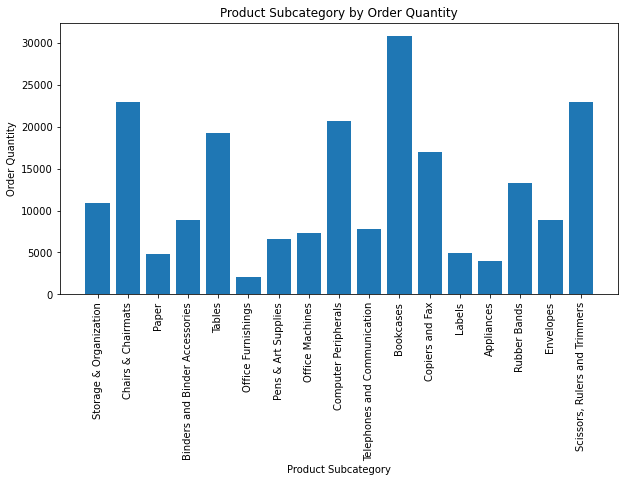

In [29]:
plt.figure(figsize=[10,5])

x = walmart['product_subcategory'].unique()
y = walmart.groupby('product_subcategory')['order_quantity'].sum()

plt.bar(x,y);
rotate();

# Dsiplay the plot
label('Product Subcategory', 'Product Subcategory by Order Quantity','Order Quantity')

Next I'll check using the count of orders instead of the order quantity to compare.

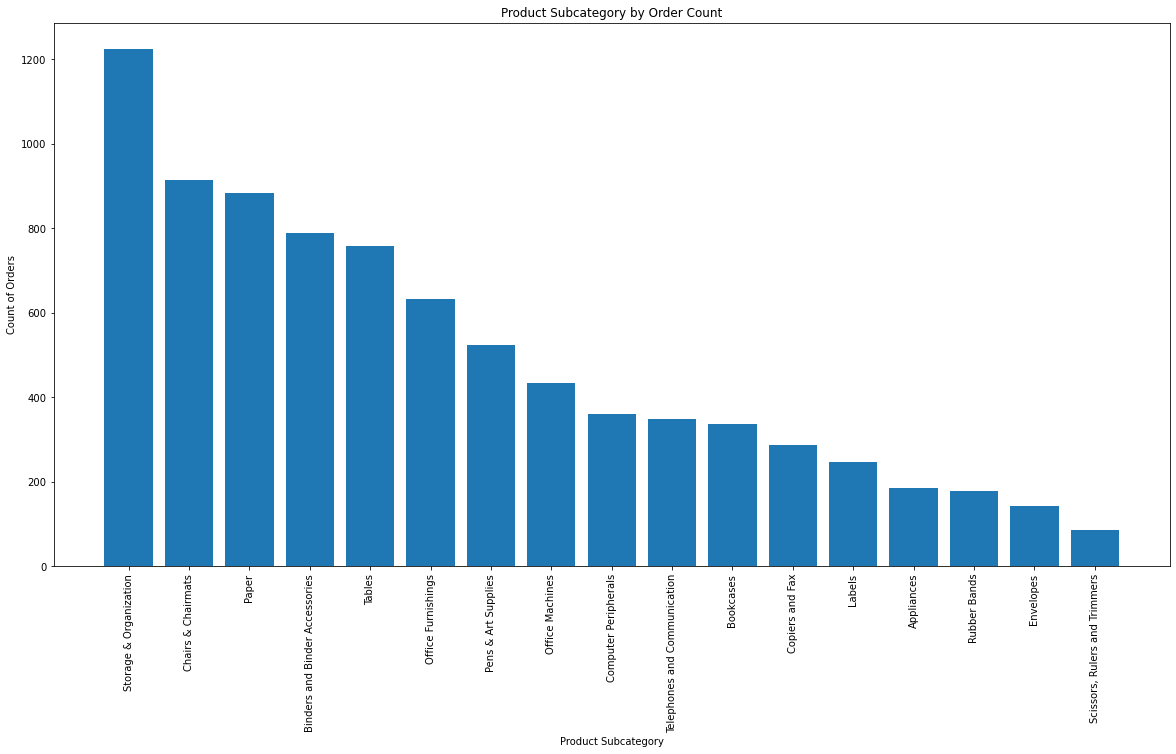

In [30]:
#size the figure the chart will be drawn in
plt.figure(figsize=[20,10]);

x = walmart['product_subcategory'].unique()
y = walmart['product_subcategory'].value_counts()

plt.bar(x, y)

rotate();

label('Product Subcategory', 'Product Subcategory by Order Count','Count of Orders')

Using order quantity vs count of orders I can see that order quantity will be the best to chart with going forward.

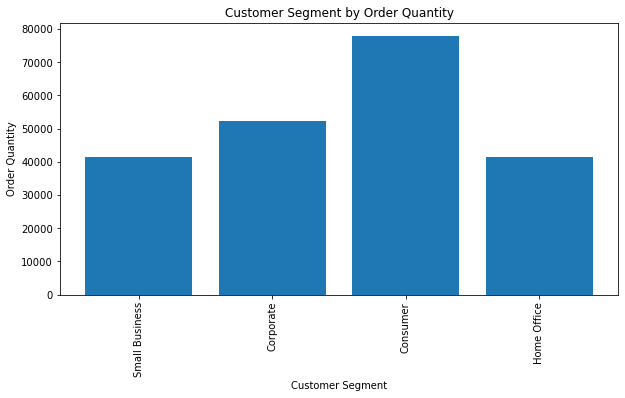

In [32]:
plt.figure(figsize=[10,5])

x = walmart['customer_segment'].unique()

y = walmart.groupby('customer_segment')['order_quantity'].sum()

plt.bar(x,y);
rotate();

label('Customer Segment', 'Customer Segment by Order Quantity', 'Order Quantity')

It looks like consumers have the highest order quantity with Corporate following.

Let's move on to product category.

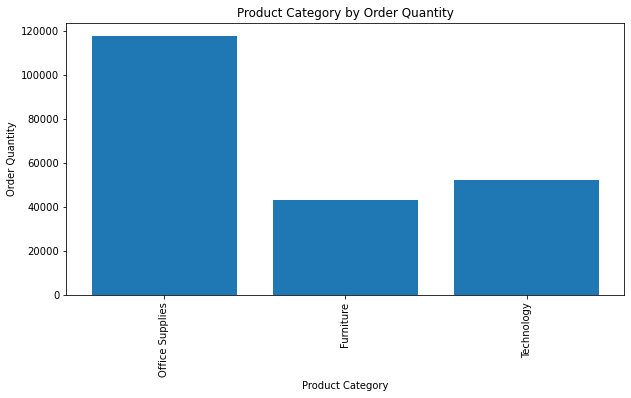

In [33]:
plt.figure(figsize=[10,5])

x = walmart['product_category'].unique()

y = walmart.groupby('product_category')['order_quantity'].sum()

plt.bar(x,y);
rotate()
label('Product Category', 'Product Category by Order Quantity', 'Order Quantity')

Here we can see that most of the orders placed was in the office supplies category.
Since the categories are few we can use a pie chart to visualize the data.

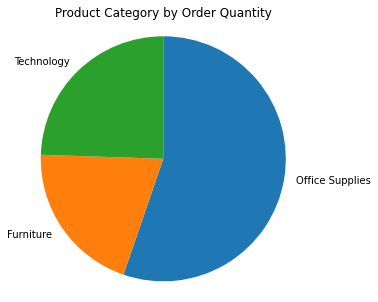

In [34]:
# plot product category in a pie chart
sort_cat = walmart.groupby('product_category')['order_quantity'].sum()

plt.figure(figsize=[20,5])
plt.pie(sort_cat, labels = sort_cat.index, startangle = 90, counterclock = False);

plt.axis('square');
plt.title('Product Category by Order Quantity');

Here we can see that the pie chart while showing us the largest slice, doesn't really differentiate the other two categories.


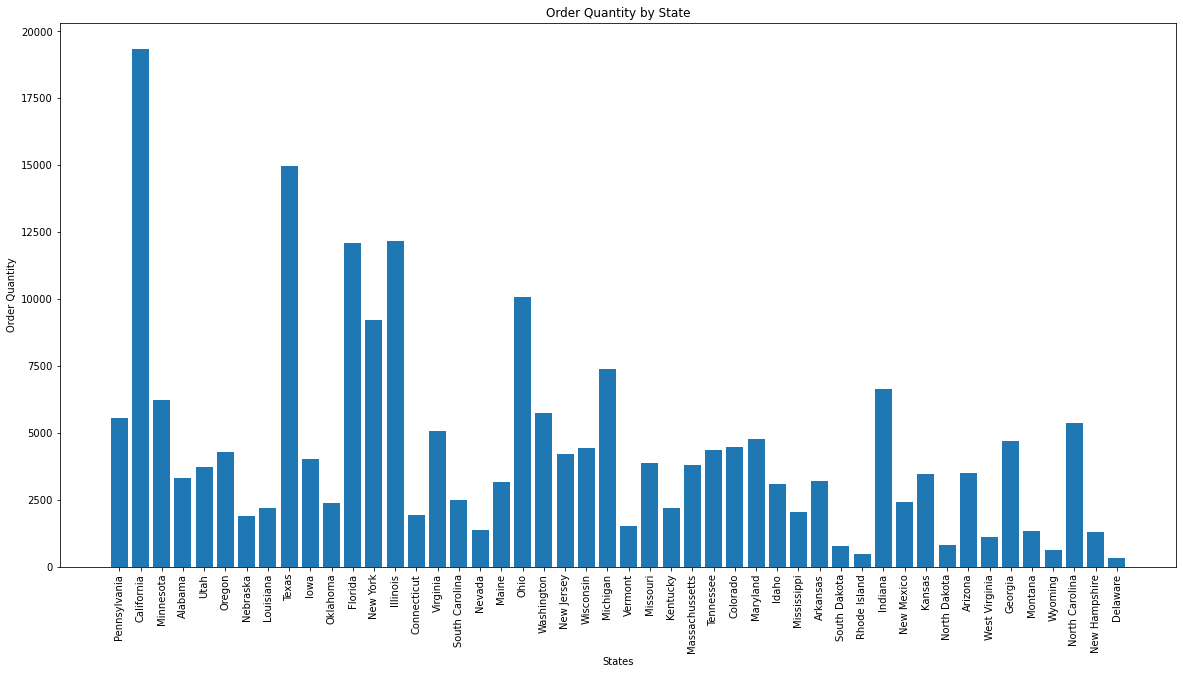

In [35]:
#adjust figsize
plt.figure(figsize=[20,10]);

x = walmart['state'].unique()
y = walmart.groupby('state')['order_quantity'].sum()

plt.bar(x, y)

rotate();

label('States', 'Order Quantity by State', 'Order Quantity')

Now, which region had the highest quantity of orders

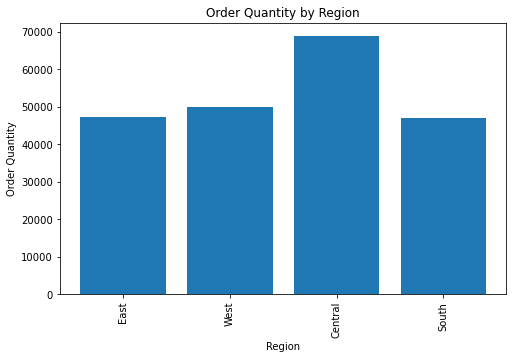

In [36]:
#adjust figsize
plt.figure(figsize=[8,5]);

x = walmart['region'].unique()
y = walmart.groupby('region')['order_quantity'].sum()

plt.bar(x, y)

rotate()
label('Region', 'Order Quantity by Region', 'Order Quantity')

Finally, let's see which shipping mode carried the most orders 

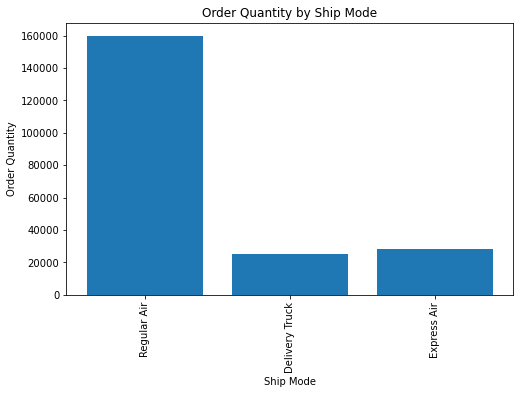

In [37]:
#adjust figsize
plt.figure(figsize=[8,5]);

x = walmart['ship_mode'].unique()
y = walmart.groupby('ship_mode')['order_quantity'].sum()

plt.bar(x, y)

rotate()
label('Ship Mode', 'Order Quantity by Ship Mode','Order Quantity')

Compared to how many orders were shipped via these modes.

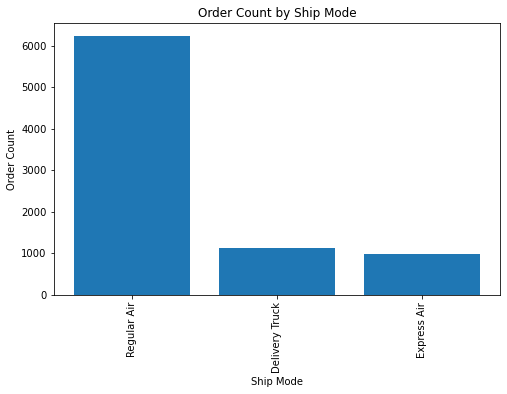

In [38]:
#size the figure the chart will be drawn in
plt.figure(figsize=[8,5]);

x = walmart['ship_mode'].unique()
y = walmart['ship_mode'].value_counts()

plt.bar(x, y)

rotate()
label('Ship Mode', 'Order Count by Ship Mode','Order Count')

Regular Air shipping is the highest by both order quantity and order count

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> product subcategory with the most order quantity: Bookcases
> product category with : Office Supplies
> region: Central US
> state: Alabama
> ship mode: Regular Air

> There were no unusual point as most of these variables are categorical and the order quantity column was clean to begin with.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The order quantity needed to be grouped by the respective categories used and then summed so it can be charted, other than that everything was fine.

## Bivariate Exploration

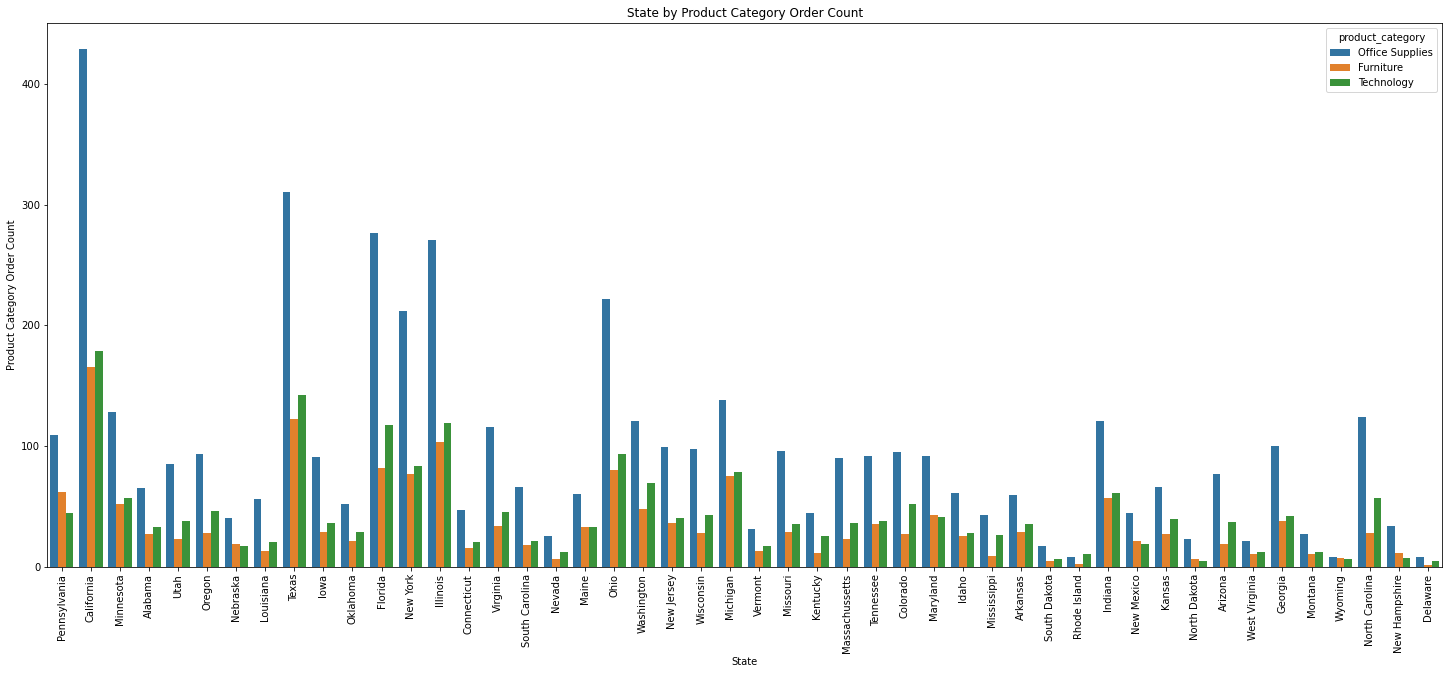

In [39]:
plt.figure(figsize = [25, 10])
sb.countplot(data =walmart, x = 'state', hue = 'product_category');
rotate()
label('State','State by Product Category Order Count' ,'Product Category Order Count')

Here we can see office supplies have the highest shipping across all states.

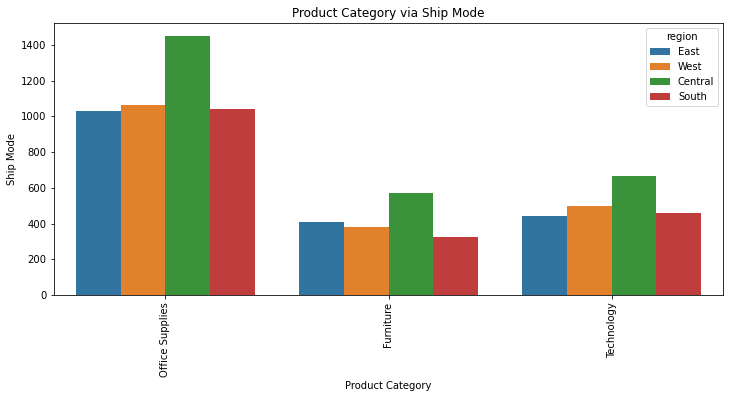

In [40]:
plt.figure(figsize = [12, 5])
sb.countplot(data =walmart, x = 'product_category', hue = 'region');
rotate()
label('Product Category', 'Product Category via Ship Mode','Ship Mode')

Central region has the highest orders across all product categories

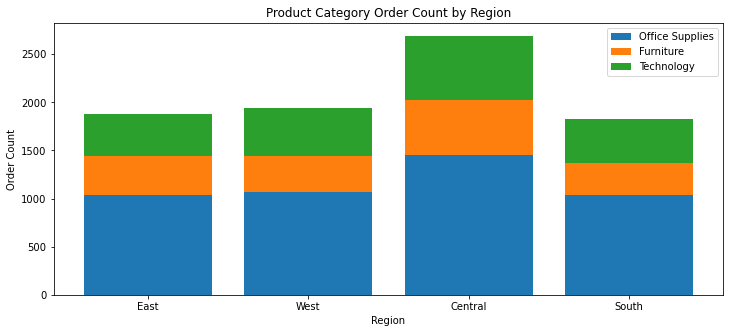

In [41]:
product_category = ['Office Supplies', 'Furniture', 'Technology']
region = ['East', 'West', 'Central', 'South']
# right plot: stacked bar chart, absolute counts
plt.figure(figsize = [12, 5])
baselines = np.zeros(len(region))
# for each second-variable category:
for i in range(len(product_category)):
    # isolate the counts of the first category,
    cat2 = product_category[i]
    inner_counts = walmart[walmart['product_category'] == cat2]['region'].value_counts()
    # then plot those counts on top of the accumulated baseline
    plt.bar(x = np.arange(len(region)), height = inner_counts[region],
            bottom = baselines)
    baselines += inner_counts[region]

plt.xticks(np.arange(len(region)), region)
plt.legend(product_category);
label('Region', 'Product Category Order Count by Region', 'Order Count')

By Region Office Supplies still has the highest order count in region as it is in by state.

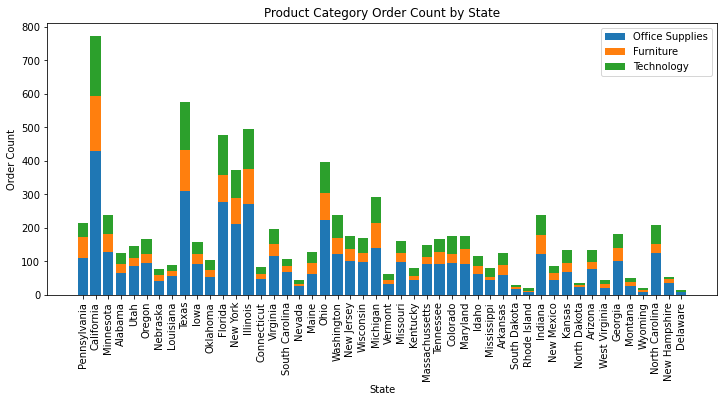

In [42]:
product_category = ['Office Supplies', 'Furniture', 'Technology']
state = ['Pennsylvania', 'California', 'Minnesota', 'Alabama', 'Utah',
       'Oregon', 'Nebraska', 'Louisiana', 'Texas', 'Iowa', 'Oklahoma',
       'Florida', 'New York', 'Illinois', 'Connecticut', 'Virginia',
       'South Carolina', 'Nevada', 'Maine', 'Ohio', 'Washington',
       'New Jersey', 'Wisconsin', 'Michigan', 'Vermont', 'Missouri',
       'Kentucky', 'Massachussetts', 'Tennessee', 'Colorado', 'Maryland',
       'Idaho', 'Mississippi', 'Arkansas', 'South Dakota', 'Rhode Island',
       'Indiana', 'New Mexico', 'Kansas', 'North Dakota', 'Arizona',
       'West Virginia', 'Georgia', 'Montana', 'Wyoming', 'North Carolina',
       'New Hampshire', 'Delaware']
# right plot: stacked bar chart, absolute counts
plt.figure(figsize = [12, 5])
baselines = np.zeros(len(state))
# for each second-variable category:
for i in range(len(product_category)):
    # isolate the counts of the first category,
    cat2 = product_category[i]
    inner_counts = walmart[walmart['product_category'] == cat2]['state'].value_counts()
    # then plot those counts on top of the accumulated baseline
    plt.bar(x = np.arange(len(state)), height = inner_counts[state],
            bottom = baselines)
    baselines += inner_counts[state]

plt.xticks(np.arange(len(state)), state, rotation=90)
plt.legend(product_category);

label('State', 'Product Category Order Count by State', 'Order Count')

Office supplies still has the highest order count across all states except delaware.

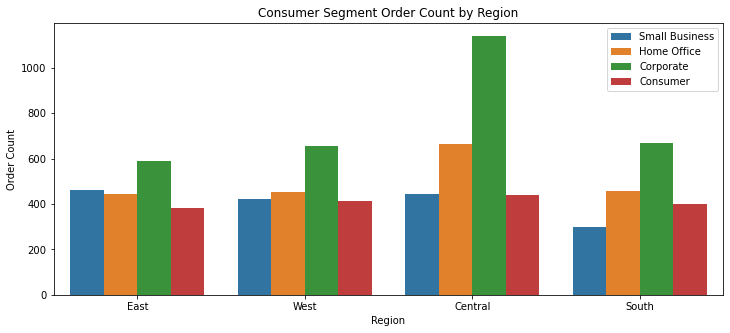

In [43]:
region = ['East', 'West', 'Central', 'South']
customer_segment = ['Small Business', 'Home Office', 'Corporate', 'Consumer']

plt.figure(figsize = [12, 5])

# left plot: clustered bar chart, absolute counts
sb.countplot(data = walmart, x = 'region', hue = 'customer_segment',
             order = region, hue_order = customer_segment)
plt.legend();
label('Region', 'Consumer Segment Order Count by Region', 'Order Count') 

Now I'll plot it in a stacked bar chart for a better view of the plot

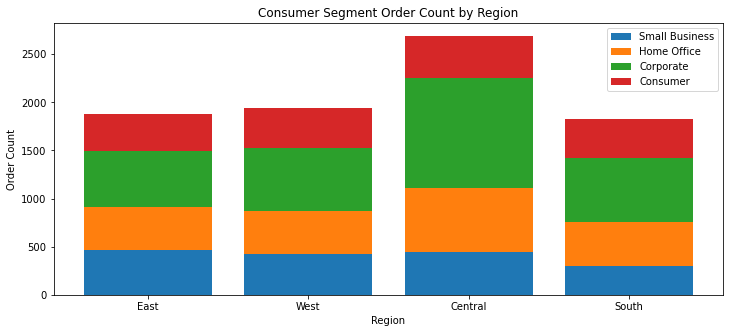

In [44]:
# right plot: stacked bar chart, absolute counts
plt.figure(figsize = [12, 5])
baselines = np.zeros(len(region))
# for each second-variable category:
for i in range(len(customer_segment)):
    # isolate the counts of the first category,
    cat2 = customer_segment[i]
    inner_counts = walmart[walmart['customer_segment'] == cat2]['region'].value_counts()
    # then plot those counts on top of the accumulated baseline
    plt.bar(x = np.arange(len(region)), height = inner_counts[region],
            bottom = baselines)
    baselines += inner_counts[region]

plt.xticks(np.arange(len(region)), region)
plt.legend(customer_segment);
label('Region', 'Consumer Segment Order Count by Region', 'Order Count')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>  The central region has the highest orders across all product categories and the highest product category order in all states is Office supplies.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes! the corporate product category in during the univariate exploration didn't have the highest orders when i compared it with order quantity but with order count it did. This also shows when I compared it with region where Central has the highest orders along with Office Supplies.

## Multivariate Exploration

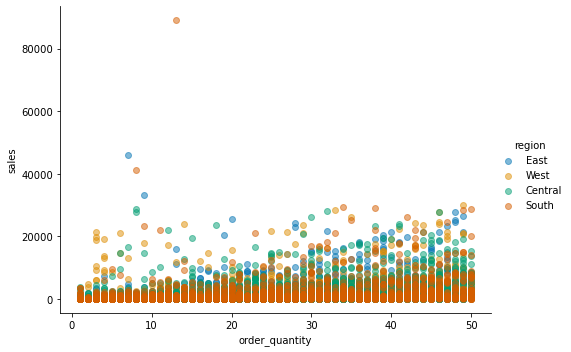

In [45]:
g = sb.FacetGrid(data = walmart, hue = 'region', height = 5, aspect=11.7/8.27, palette = 'colorblind')

g.map(plt.scatter, 'order_quantity', 'sales', alpha=0.5)
g.add_legend();


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
> Comparing product category, sales and order_quantity we see that West region had the most expensive product buy compared to other regions.
### Were there any interesting or surprising interactions between features?

> Yes. I expected the highest product buy to come from the Central region since it had the highest orders across all product categories.

## Conclusions
>At the start of this exploration I compared categories with their order quantity to find out which products, regions and states had the highest orders. We discovered that Alabama had the highest orders, the region with the most orders was Central and the products with the most orders were office supplies.

> But at the end I found out that the most expenive order placed by the West region in Technology. 
